**Sentiment Analysis on Hotel Review in Europe| ANGUIDES: A Next Generation Echo-friendly Travelling & Guides**

This is part of our research project: Green Travel, here is a sentiment analysis based on hotel reviews using machine learning and deep learning algorithms.

**This project will be conducted by the following steps:**
1. Load the dataset
2. Experimental Setup 
3. Text Cleaning Approach 
4. Exploratory Data Analysis (EDA)
5. Principle Component Analysis & Dimensions Reduction
6. Features Extraction  
7. Algorithms Selection 
8. Topic Modelling  

**Phase 1: Load the Dataset**

NB: Here I have opened the dataset from my google drive. You may open it from your local pc or somewhere else. But I used to apply this proecedure because it is more efficient way.

In [ ]:
# #Import the drive module for accessing the google drive 
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [ ]:
import pandas as pd # Importing the pandas module for reading the data
def load_data():# Function for opening the dataset 
    data =pd.read_csv("/content/drive/MyDrive/Green Travel/Hotel_Reviews.csv")
    return data

In [ ]:
reviews_df = load_data() # Call the function 
reviews_df.head(5)# Print the last 2 index data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


**Phase 2: Experimental Setup**

We have seen that the reviews are seperated so, we have to combine it into a single data frame. For that, we have append the positive and negative text reviews

In [ ]:
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["label"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "label"]]

In [ ]:
reviews_df.head(5)

,review,label
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


Now we have to sampled the dataset in order to speed up computations.

In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

Setup is ready. Now we will jump into the Phase 3: Text Cleaning Approach

**Phase 3: Text Cleanig Approach**

Data also collected from various sources so it may contains numerous of noise that should be preprocessed in order to get better accuracy. The following steps has been conducted to preprocess the text. 

Step 1 : Converting html entities <br>
Step 2 : Removing "@user" from all the tweets <br>
Step 3 : Changing all the tweets into lowercase <br>
Step 4 : Apostrophe Lookup <br>
Step 5 : Short Word Lookup <br>
Step 6 : Emoticon Lookup <br>
Step 7 : Replacing Special Characters with space <br>
Step 8 : Replacing Numbers (integers) with space <br>
Step 9 : Removing words whom length is 1 <br>
Step 10 : Tokenization - Converting a sentence into list of words <br>
Step 11 : Remove stopwords <br>
Step 12 : Lammetization/stemming - Tranforming any form of a word to its root word <br>
Step 13: Removal URLS <br>
STEP 14: Removal HTML Taggs <br>

**Step 1 : Converting html entities** 

In [ ]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [ ]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [ ]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
reviews_df['clean_review'] = reviews_df['review'].apply(lambda x: html_parser.unescape(x))
reviews_df.tail(10)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

**Step 2 : Removing "@user" from all the comments**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# remove (@user) from comments 
reviews_df['clean_review'] = np.vectorize(remove_pattern)(reviews_df['clean_review'], "@[\w]*")
reviews_df.tail(10)

,review,label,clean_review
278968,No Negative 1 minute to metropol five minutes ...,0,No Negative 1 minute to metropol five minutes ...
474145,No Negative Staff was really professional Room...,0,No Negative Staff was really professional Room...
276444,Would have been better if there were more lif...,0,Would have been better if there were more lif...
203433,Nothing Location great Staff Perfect like a 5...,0,Nothing Location great Staff Perfect like a 5...
52289,The basic free wi fy is terrible I m sure the...,0,The basic free wi fy is terrible I m sure the...
274862,Bathroom water easy made the bathroom wet whe...,0,Bathroom water easy made the bathroom wet whe...
9732,Room very small chair tatty in the room No Po...,1,Room very small chair tatty in the room No Po...
424201,Expensive rates and mini bar prices Roof top ...,0,Expensive rates and mini bar prices Roof top ...
72380,There was a very loud AC machine right outsid...,0,There was a very loud AC machine right outsid...
273809,This is definitely not 4 stars hotel Location...,0,This is definitely not 4 stars hotel Location...


**Step 3 : Changing all the reviews into lowercase**

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: x.lower())
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms 9th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 4 : Apostrophe Lookup**

In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [ ]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: lookup_dict(x,apostrophe_dict))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms 9th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 5 : Short Word Lookup**

In [ ]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: lookup_dict(x,short_word_dict))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms 9th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 6 : Emoticon Lookup**

In [ ]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [ ]:
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: lookup_dict(x,emoticon_dict))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms 9th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 7 : ReplacingPunctuations with space**

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
reviews_df.head(5)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff


**Step 8 : Replacing Special Characters with space**

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms 9th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 9 : Replacing Numbers (integers) with space**

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated a shop in the hotel th...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel v welcoming staff
302161,They don t have free wifi The location is per...,0,they don t have free wifi the location is per...
317079,Room generally a bit shabby with some lack of...,0,room generally a bit shabby with some lack of...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms th floor don t have a bath t...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centralit...
195089,Didn t like it at all construction was in pro...,1,didn t like it at all construction was in pro...


**Step 10 : Removing words whom length is 1**

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
reviews_df['clean_review'][0:5]

488440    would have appreciated shop in the hotel that ...
274649    no tissue paper box was present at the roomno ...
374688                   pillows nice welcoming and service
404352    no negative everything including the nice upgr...
451596             no negative lovely hotel welcoming staff
Name: clean_review, dtype: object

**Step 11: Remove URL from Text**

In [ ]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: remove_urls(x))
reviews_df.head(10)

,review,label,clean_review
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel welcoming staff
302161,They don t have free wifi The location is per...,0,they don have free wifi the location is perfec...
317079,Room generally a bit shabby with some lack of...,0,room generally bit shabby with some lack of ma...
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms th floor don have bath their w...
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centrality...
195089,Didn t like it at all construction was in pro...,1,didn like it at all construction was in progre...


**Step 12 : Spelling Correction - With TextBlob Library**

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [ ]:
# we can see all the similar matches our first error along with the probability score.
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

**Applying TextBlob on our data set - Spelling correction**

In [ ]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = reviews_df['clean_review'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

488440    would have appreciated shop in the hotel that ...
274649    no tissue paper box was present at the room po...
374688                   pillows nice welcoming and service
404352    no negative everything including the nice upgr...
451596             no negative lovely hotel welcoming staff
302161    they don have free wife the location is perfec...
317079    room generally bit shabby with some lack of ma...
13963     executive rooms th floor don have bath their w...
159785    pity about the two days of rain its neutrality...
195089    didn like it at all construction was in progre...
Name: clean_review, dtype: object

In [ ]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Creating token for the clean tweets
reviews_df['review_token'] = reviews_df['clean_review'].apply(lambda x: word_tokenize(x))
reviews_df.head(10)

,review,label,clean_review,review_token
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...,"[would, have, appreciated, shop, in, the, hote..."
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...,"[no, tissue, paper, box, was, present, at, the..."
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service,"[pillows, nice, welcoming, and, service]"
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...,"[no, negative, everything, including, the, nic..."
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel welcoming staff,"[no, negative, lovely, hotel, welcoming, staff]"
302161,They don t have free wifi The location is per...,0,they don have free wifi the location is perfec...,"[they, don, have, free, wifi, the, location, i..."
317079,Room generally a bit shabby with some lack of...,0,room generally bit shabby with some lack of ma...,"[room, generally, bit, shabby, with, some, lac..."
13963,Executive rooms 9th Floor don t have a bath T...,0,executive rooms th floor don have bath their w...,"[executive, rooms, th, floor, don, have, bath,..."
159785,Pity about the two days of rain Its centralit...,0,pity about the two days of rain its centrality...,"[pity, about, the, two, days, of, rain, its, c..."
195089,Didn t like it at all construction was in pro...,1,didn like it at all construction was in progre...,"[didn, like, it, at, all, construction, was, i..."


In [ ]:
# Importing stop words from NLTK corpus for english language
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:

# Created new columns of tokens - where stop words are being removed
reviews_df['review_token_filtered'] = reviews_df['review_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
reviews_df[['review_token', 'review_token_filtered']].head(10)

,review_token,review_token_filtered
488440,"[would, have, appreciated, shop, in, the, hote...","[would, appreciated, shop, hotel, sold, drinki..."
274649,"[no, tissue, paper, box, was, present, at, the...","[tissue, paper, box, present, roomno, positive]"
374688,"[pillows, nice, welcoming, and, service]","[pillows, nice, welcoming, service]"
404352,"[no, negative, everything, including, the, nic...","[negative, everything, including, nice, upgrad..."
451596,"[no, negative, lovely, hotel, welcoming, staff]","[negative, lovely, hotel, welcoming, staff]"
302161,"[they, don, have, free, wifi, the, location, i...","[free, wifi, location, perfect, lot, time, wan..."
317079,"[room, generally, bit, shabby, with, some, lac...","[room, generally, bit, shabby, lack, maintenan..."
13963,"[executive, rooms, th, floor, don, have, bath,...","[executive, rooms, th, floor, bath, website, m..."
159785,"[pity, about, the, two, days, of, rain, its, c...","[pity, two, days, rain, centrality, proximity,..."
195089,"[didn, like, it, at, all, construction, was, i...","[like, construction, progress, stuff, lied, us..."


**We will create 2 new columns**
*   One For Stemming 
*   Second For Lemmatization 
The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [ ]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
reviews_df['review_stemmed'] = reviews_df['review_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
reviews_df['review_stemmed'].head(10)

488440    would appreci shop hotel sold drink water etc ...
274649                 tissu paper box present roomno posit
374688                            pillow nice welcom servic
404352    neg everyth includ nice upgrad hotel revamp su...
451596                          neg love hotel welcom staff
302161    free wifi locat perfect lot time want look cit...
317079    room gener bit shabbi lack mainten crumb bedro...
13963     execut room th floor bath websit made look lik...
159785              piti two day rain central proxim destin
195089    like construct progress stuff lie us vacanc li...
Name: review_stemmed, dtype: object

Lemmatization - Lemmatization is the process of converting a word to its base form.

In [ ]:
# Importing library for lemmatizing
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
reviews_df['review_lemmatized'] = reviews_df['review_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
reviews_df['review_lemmatized'].head(10)

488440    would appreciated shop hotel sold drinking wat...
274649             tissue paper box present roomno positive
374688                        pillow nice welcoming service
404352    negative everything including nice upgrade hot...
451596                negative lovely hotel welcoming staff
302161    free wifi location perfect lot time want look ...
317079    room generally bit shabby lack maintenance cru...
13963     executive room th floor bath website made look...
159785    pity two day rain centrality proximity destina...
195089    like construction progress stuff lied u vacanc...
Name: review_lemmatized, dtype: object

In [ ]:
reviews_df.head(5)

,review,label,clean_review,review_token,review_token_filtered,review_stemmed,review_lemmatized
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...,"[would, have, appreciated, shop, in, the, hote...","[would, appreciated, shop, hotel, sold, drinki...",would appreci shop hotel sold drink water etc ...,would appreciated shop hotel sold drinking wat...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...,"[no, tissue, paper, box, was, present, at, the...","[tissue, paper, box, present, roomno, positive]",tissu paper box present roomno posit,tissue paper box present roomno positive
374688,Pillows Nice welcoming and service,0,pillows nice welcoming and service,"[pillows, nice, welcoming, and, service]","[pillows, nice, welcoming, service]",pillow nice welcom servic,pillow nice welcoming service
404352,No Negative Everything including the nice upgr...,0,no negative everything including the nice upgr...,"[no, negative, everything, including, the, nic...","[negative, everything, including, nice, upgrad...",neg everyth includ nice upgrad hotel revamp su...,negative everything including nice upgrade hot...
451596,No Negative Lovely hotel v welcoming staff,0,no negative lovely hotel welcoming staff,"[no, negative, lovely, hotel, welcoming, staff]","[negative, lovely, hotel, welcoming, staff]",neg love hotel welcom staff,negative lovely hotel welcoming staff


Now When Our Data Is Cleaned & Ready We Start Our Text Analysis

We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"
Will see the most commonly used words for both the columns i.e. "tweet_stemmed" & "tweet_lematized"

**Word Cloud Visualization**

"Most Common words in column Hotel review by Stemming approach

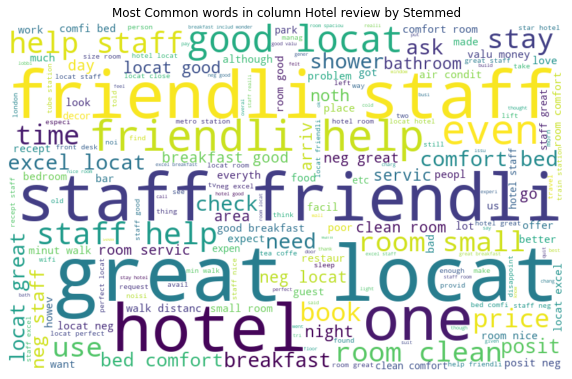

In [ ]:

#visualizing all the words in column "review_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in reviews_df['review_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Hotel review by Stemmed")
plt.show()

Most Common words in column Hotel Review Lemmatize approach

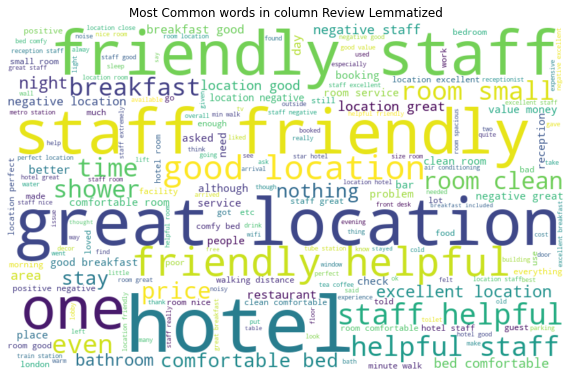

In [ ]:
#Visualizing all the words in column "review_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in reviews_df['review_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Review Lemmatized")
plt.show()

**Positive word in hotel review**

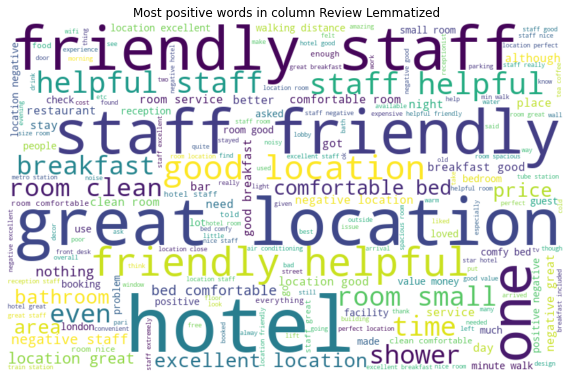

In [ ]:
#Visualizing all the normal/ positive word in hotel review
normal_words =' '.join([text for text in reviews_df['review_lemmatized'][reviews_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Review Lemmatized")
plt.show()

**Visualize the most negative words by WORD CLOUD**

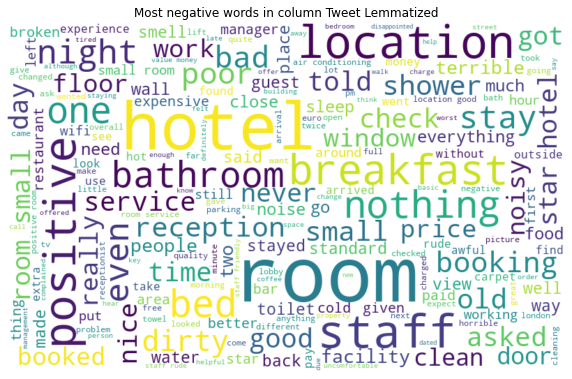

In [ ]:
#Visualizing all the negative words in column "review_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in reviews_df['review_lemmatized'][reviews_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most negative words in column Tweet Lemmatized")
plt.show()

If we have a look at the most negative words in column Tweet Lemmatized, we can be clearly observed that the number of things are responsible for customner satisfaction. In order to ensure the traveller satisfaction, our system will focus on the topic that we are observing by the word cloud visualization

Our Text Cleaning Approach is almost complete. Now we will seperately save this preprocessing file for further use.

In [ ]:
pip install pyLDAvis

**Topic Modelling**

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk import FreqDist
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# Import the wordcloud library
from wordcloud import WordCloud

In [ ]:
reviews_df.head(2)

,review,label,clean_review,review_token,review_token_filtered,review_stemmed,review_lemmatized
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...,"[would, have, appreciated, shop, in, the, hote...","[would, appreciated, shop, hotel, sold, drinki...",would appreci shop hotel sold drink water etc ...,would appreciated shop hotel sold drinking wat...
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...,"[no, tissue, paper, box, was, present, at, the...","[tissue, paper, box, present, roomno, positive]",tissu paper box present roomno posit,tissue paper box present roomno positive


In [ ]:
# nltk.download('tagsets')
# nltk.help.upenn_tagset()# tagset documentation
# nltk.download('wordnet')
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV
# we will use it later in the loop.
#tag_map

In [ ]:
nltk.download('averaged_perceptron_tagger')
#lemmatization
from nltk.stem import WordNetLemmatizer 
 # Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

reviews_df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in reviews_df['review_token_filtered']] 
reviews_df.head(2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,label,clean_review,review_token,review_token_filtered,review_stemmed,review_lemmatized,lemma
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...,"[would, have, appreciated, shop, in, the, hote...","[would, appreciated, shop, hotel, sold, drinki...",would appreci shop hotel sold drink water etc ...,would appreciated shop hotel sold drinking wat...,"[would, appreciate, shop, hotel, sell, drinkin..."
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...,"[no, tissue, paper, box, was, present, at, the...","[tissue, paper, box, present, roomno, positive]",tissu paper box present roomno posit,tissue paper box present roomno positive,"[tissue, paper, box, present, roomno, positive]"


Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(reviews_df['lemma'])

# Create Corpus
texts = reviews_df['lemma']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Applying TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:

# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.090*"hotel" + 0.030*"stay" + 0.022*"would" + 0.021*"like" + 0.020*"nothing" + 0.015*"go" + 0.015*"need" + 0.015*"make" + 0.014*"also" + 0.014*"u"'),
 (1,
  '0.041*"positive" + 0.025*"coffee" + 0.019*"poor" + 0.017*"tea" + 0.015*"charge" + 0.014*"beautiful" + 0.013*"extra" + 0.013*"way" + 0.013*"drink" + 0.012*"available"'),
 (2,
  '0.093*"room" + 0.066*"staff" + 0.055*"location" + 0.040*"breakfast" + 0.038*"good" + 0.034*"negative" + 0.031*"great" + 0.027*"bed" + 0.024*"friendly" + 0.022*"clean"'),
 (3,
  '0.027*"room" + 0.025*"night" + 0.025*"reception" + 0.023*"check" + 0.022*"get" + 0.022*"day" + 0.020*"work" + 0.018*"book" + 0.016*"take" + 0.015*"ask"'),
 (4,
  '0.031*"bathroom" + 0.028*"could" + 0.026*"station" + 0.026*"walk" + 0.023*"shower" + 0.022*"area" + 0.015*"floor" + 0.015*"minute" + 0.015*"big" + 0.014*"metro"')]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews_df['lemma'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.956075590410514

Coherence Score:  0.6421025457679883


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

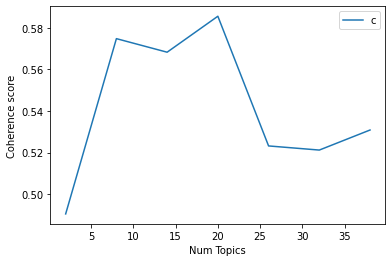

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=reviews_df['lemma'], start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
reviews_df.head(2)

,review,label,clean_review,review_token,review_token_filtered,review_stemmed,review_lemmatized,lemma
488440,Would have appreciated a shop in the hotel th...,0,would have appreciated shop in the hotel that ...,"[would, have, appreciated, shop, in, the, hote...","[would, appreciated, shop, hotel, sold, drinki...",would appreci shop hotel sold drink water etc ...,would appreciated shop hotel sold drinking wat...,"[would, appreciate, shop, hotel, sell, drinkin..."
274649,No tissue paper box was present at the roomNo...,0,no tissue paper box was present at the roomno ...,"[no, tissue, paper, box, was, present, at, the...","[tissue, paper, box, present, roomno, positive]",tissu paper box present roomno posit,tissue paper box present roomno positive,"[tissue, paper, box, present, roomno, positive]"


**Finding the dominant topic in each sentence**

In [ ]:
data=reviews_df['lemma']
optimal_model = model_list[3]
# Convert to list
data = list(reviews_df['lemma'])
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output  
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.3532,"hotel, stay, would, negative, definitely, loca...","[would, appreciate, shop, hotel, sell, drinkin..."
1,1,12.0,0.5908,"breakfast, hotel, staff, room, good, food, res...","[tissue, paper, box, present, roomno, positive]"
2,2,6.0,0.8100,"bed, staff, room, comfortable, friendly, helpf...","[pillow, nice, welcome, service]"
3,3,11.0,0.3160,"staff, negative, location, great, friendly, ex...","[negative, everything, include, nice, upgrade,..."
4,4,11.0,0.8417,"staff, negative, location, great, friendly, ex...","[negative, lovely, hotel, welcome, staff]"
5,5,4.0,0.4967,"hotel, stay, would, negative, definitely, loca...","[free, wifi, location, perfect, lot, time, wan..."
6,6,0.0,0.2591,"room, clean, small, location, good, nice, brea...","[room, generally, bit, shabby, lack, maintenan..."
7,7,17.0,0.6015,"room, would, floor, bar, hotel, coffee, make, ...","[executive, room, th, floor, bath, website, ma..."
8,8,2.0,0.5187,"station, walk, location, hotel, close, room, g...","[pity, two, day, rain, centrality, proximity, ..."
9,9,7.0,0.5165,"room, hotel, star, high, small, view, building...","[like, construction, progress, stuff, lie, u, ..."


**Find the most representative document for each topic**

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9472,"room, clean, small, location, good, nice, brea...","[room, little, small, side, spend, much, time,..."
1,1.0,0.9367,"room, hotel, upgrade, staff, free, drink, comp...","[like, fact, pay, spa, hotel, able, use, spa, ..."
2,2.0,0.9604,"station, walk, location, hotel, close, room, g...","[negative, hotel, nice, big, room, great, loac..."
3,3.0,0.8944,"room, bathroom, toilet, wall, location, smell,...","[old, style, hotel, smell, cigaretes, smoke, r..."
4,4.0,0.9321,"hotel, stay, would, negative, definitely, loca...","[negative, absolutely, love, stay, staff, love..."
5,5.0,0.9587,"room, breakfast, pay, charge, money, hotel, ca...","[take, additional, per, night, deposit, return..."
6,6.0,0.9406,"bed, staff, room, comfortable, friendly, helpf...","[negative, good, location, go, room, spacious,..."
7,7.0,0.9367,"room, hotel, star, high, small, view, building...","[type, room, see, site, old, room, old, furnit..."
8,8.0,0.9208,"room, positive, shower, air, hot, water, windo...","[even, though, air, con, hot, hotel, window, c..."
9,9.0,0.9269,"bed, room, double, single, two, good, like, lo...","[room, small, strong, smell, curry, spice, res..."


**Topic distribution across documents**

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
#df_dominant_topics.sort_values(by=['Dominant_Topic'], inplace=True)
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"hotel, stay, would, negative, definitely, loca...",6514.0,0.1263
1.0,12.0,"breakfast, hotel, staff, room, good, food, res...",1069.0,0.0207
2.0,6.0,"bed, staff, room, comfortable, friendly, helpf...",4662.0,0.0904
3.0,11.0,"staff, negative, location, great, friendly, ex...",1419.0,0.0275
4.0,11.0,"staff, negative, location, great, friendly, ex...",2440.0,0.0473
5.0,4.0,"hotel, stay, would, negative, definitely, loca...",1804.0,0.0350
6.0,0.0,"room, clean, small, location, good, nice, brea...",6164.0,0.1195
7.0,17.0,"room, would, floor, bar, hotel, coffee, make, ...",1337.0,0.0259
8.0,2.0,"station, walk, location, hotel, close, room, g...",3073.0,0.0596
9.0,7.0,"room, hotel, star, high, small, view, building...",802.0,0.0156


**Visualize the topics**

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.382048  0.124959       1        1  37.891512
0     -0.090797 -0.308349       2        1  22.634592
3      0.061250 -0.173276       3        1  15.114356
4     -0.196398  0.234457       4        1  15.113109
1     -0.156103  0.122209       5        1   9.246432, topic_info=              Term          Freq         Total Category  logprob  loglift
23           hotel  19452.000000  19452.000000  Default  30.0000  30.0000
40            room  37188.000000  37188.000000  Default  29.0000  29.0000
45           staff  23643.000000  23643.000000  Default  28.0000  28.0000
74        location  19695.000000  19695.000000  Default  27.0000  27.0000
4        breakfast  14432.000000  14432.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1072          full    480.403643    481.191425   Topic5  -5.2094   2.3793
354          speak    474.729425    475.520728   Topic5  -5.2213   2.3793
875   receptionist    467.228957    468.021316   Topic5  -5.2372   2.3792
89            lack    449.139789    449.924454   Topic5  -5.2767   2.3792
1049        across    455.526626    456.327880   Topic5  -5.2626   2.3792

[202 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
139       2  0.999630  access
1049      5  0.999281  across
248       3  0.999279     air
522       2  0.903636    also
522       4  0.096233    also
...     ...       ...     ...
202       1  0.967590    well
202       2  0.032110    well
483       3  0.999431  window
204       3  0.999645    work
54        2  0.999880   would

[189 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

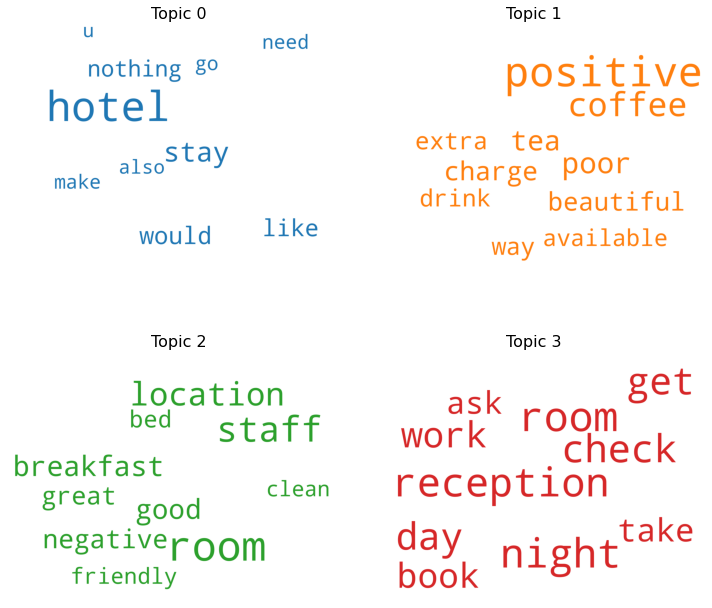

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

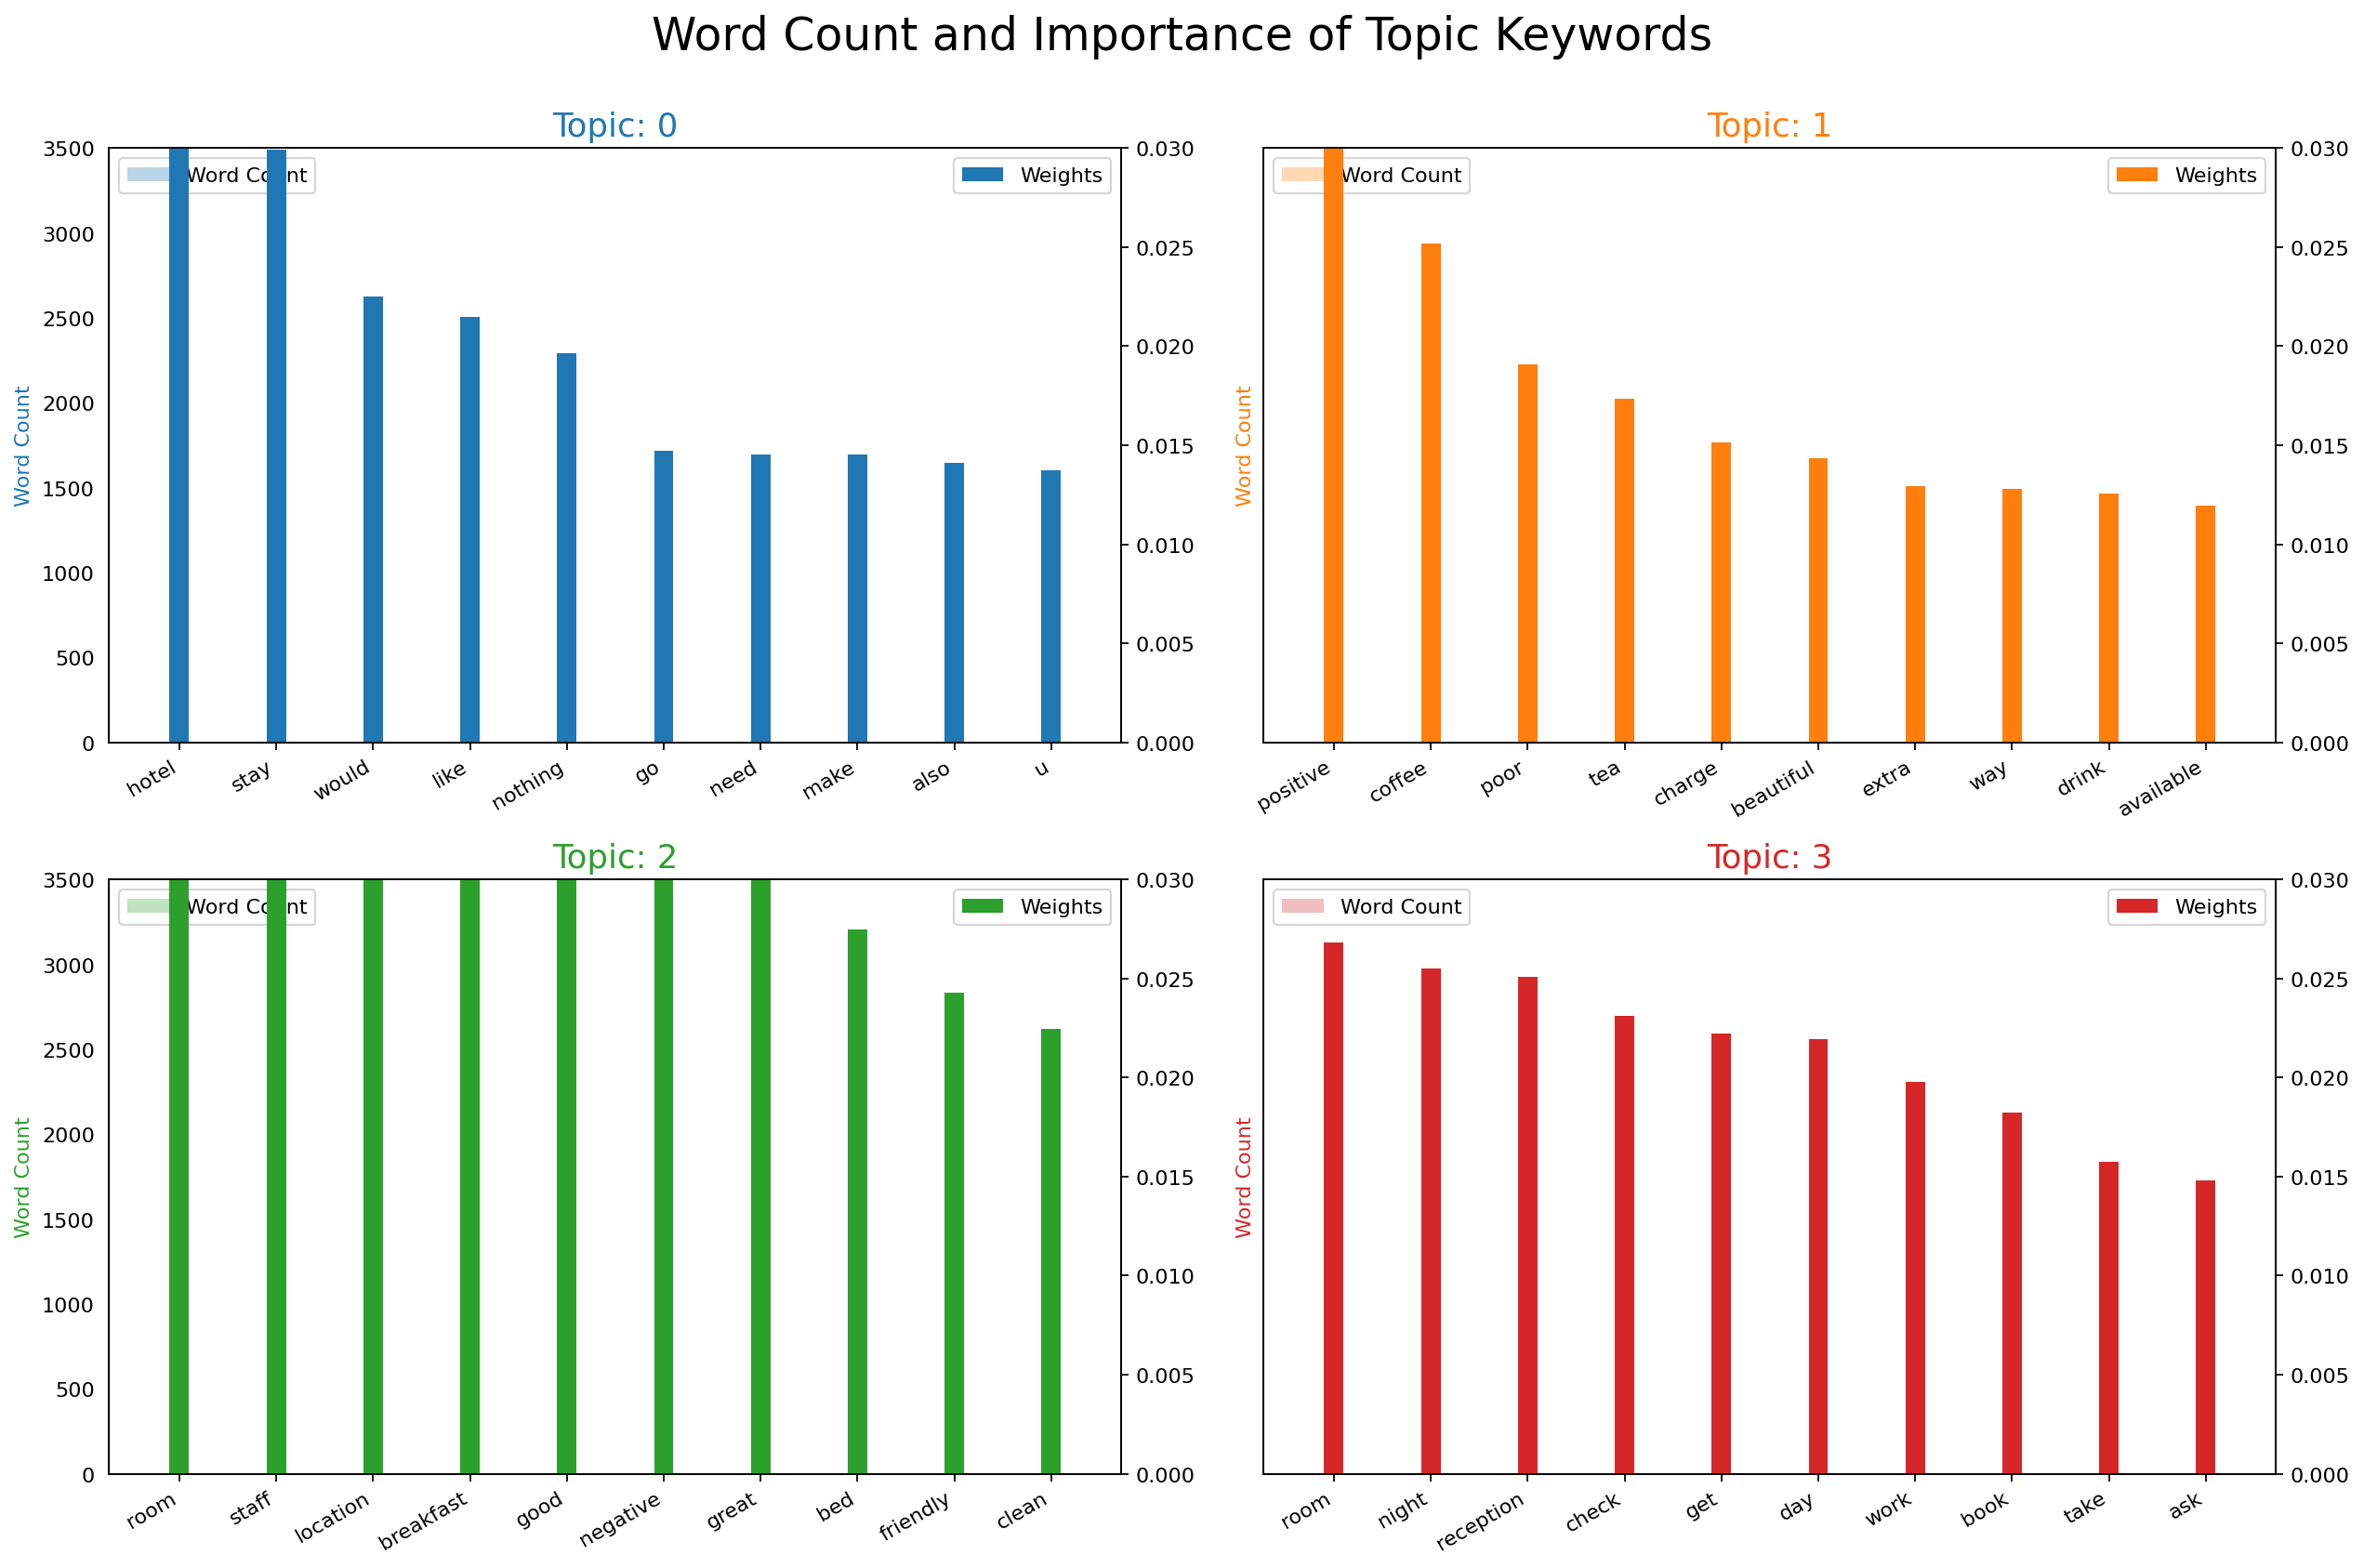

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in reviews_df for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

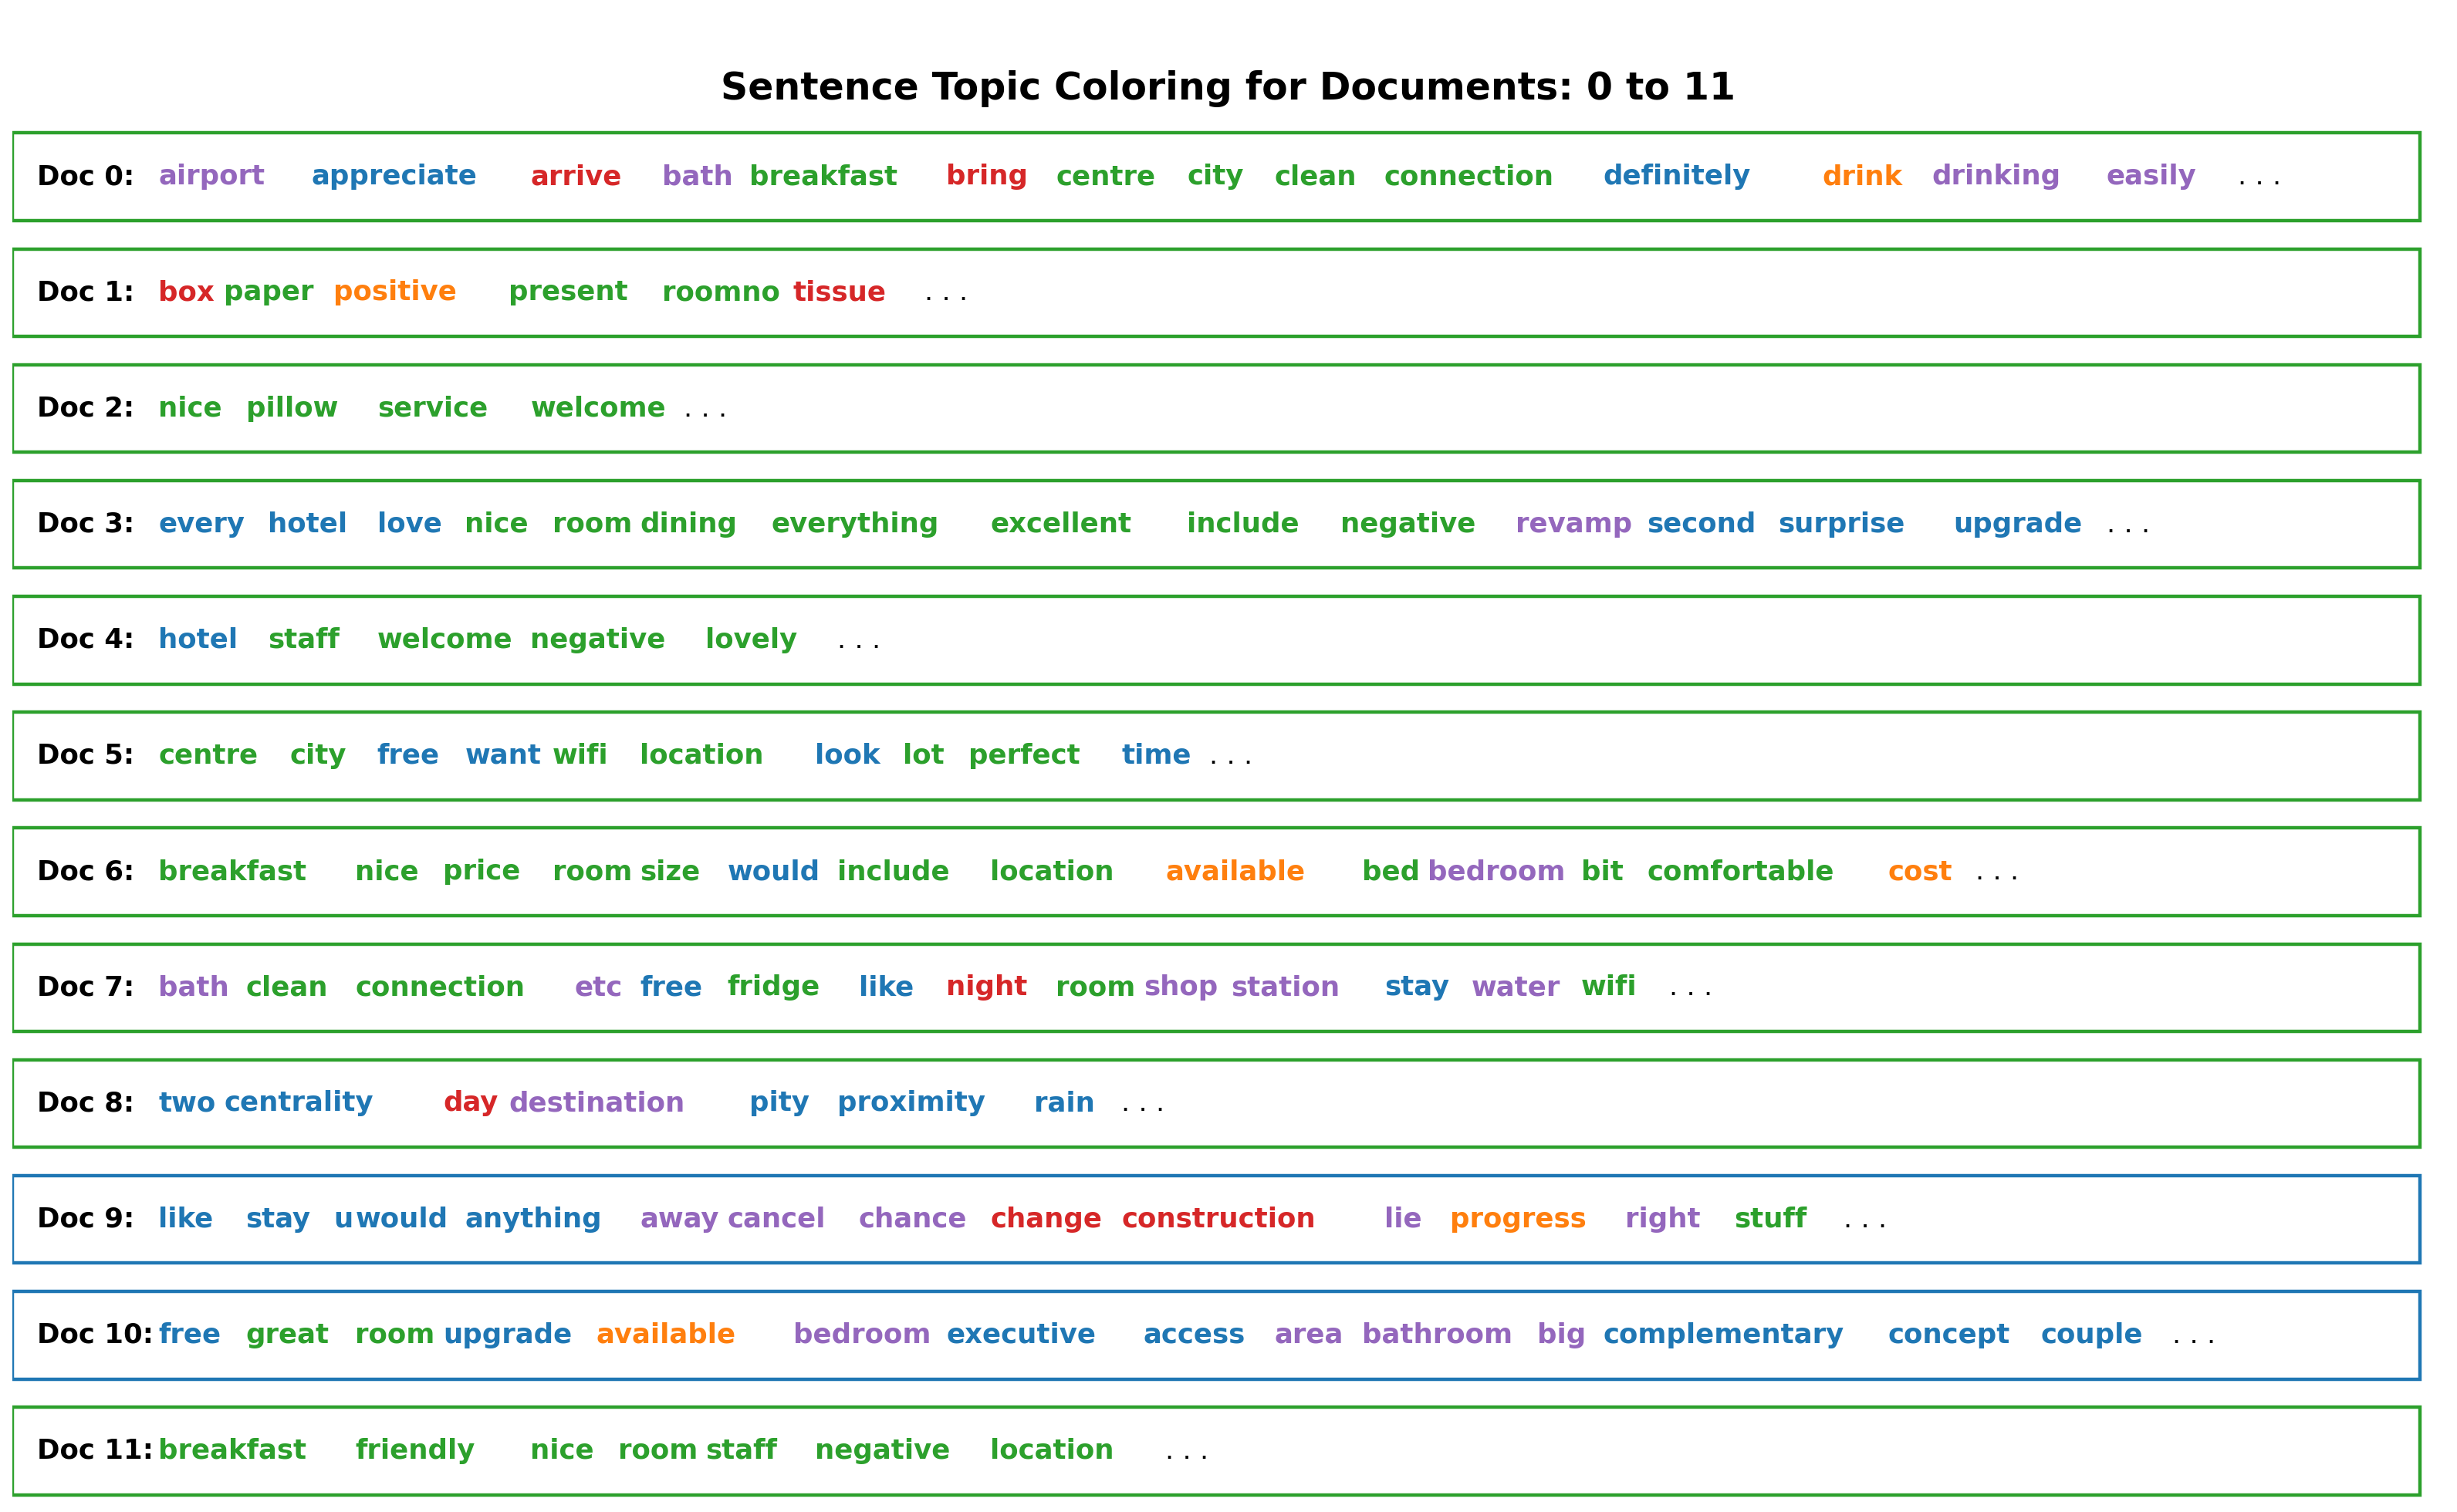

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

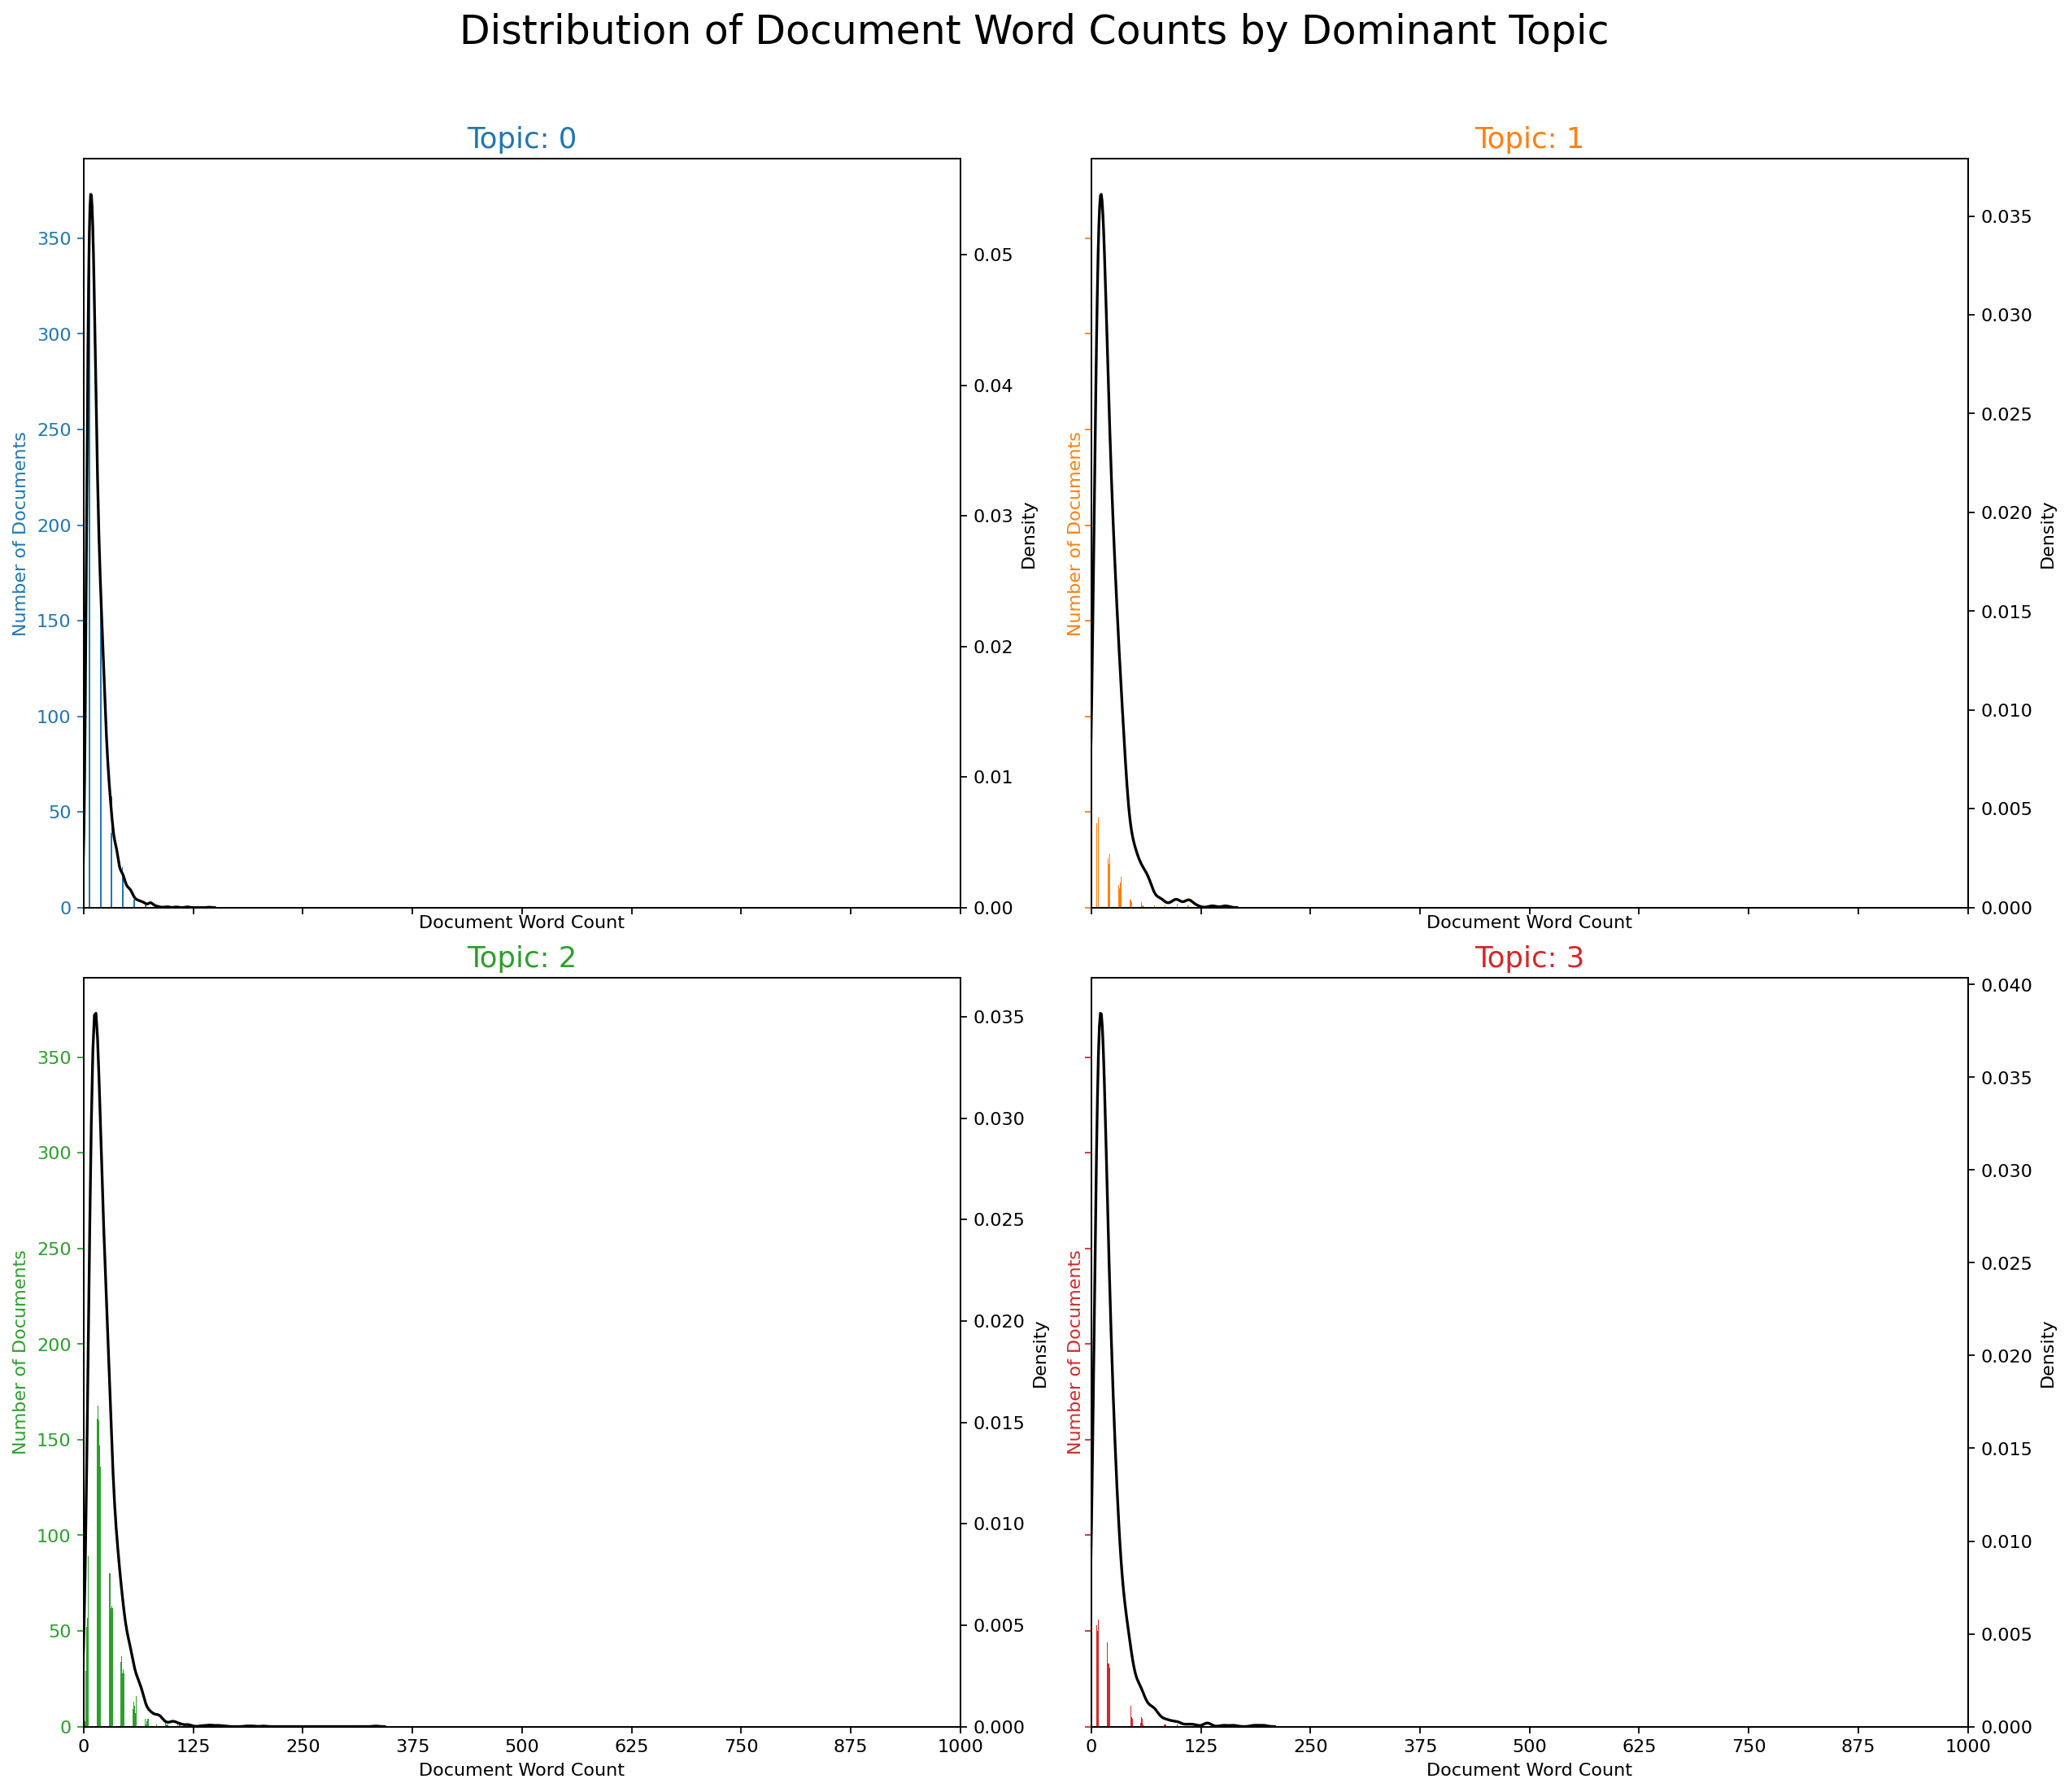

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

**Saving the preprocessing file into the Google Drive's folder.**

In [ ]:
# reviews_df.to_csv('/content/drive/MyDrive/Green Travel/green_clean_file.csv')